# **DIGIT RECOGNITION USING ANN**

### **Importing the Libraries**

In [74]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

### loading the data and splitting the dataset

In [75]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [76]:
len(x_train),len(x_test) # sizze of dataset

(60000, 10000)

### Plotting the image which is in the array format

In [77]:
x_train[1].shape

(28, 28)

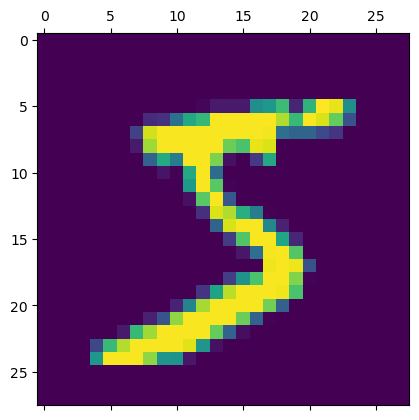

In [78]:
plt.matshow(x_train[0])

In [79]:
x_train[0].shape

(28, 28)

In [80]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [81]:
# x_train=x_train/255
# x_test=x_test/255

In [82]:
# flattenig the data set
x_train_flattened=x_train.reshape(len(x_train),784)
x_test_flattened=x_test.reshape(len(x_test),784)


### we have converted the 3 dim --> 2dim

In [83]:
x_train_flattened.shape,x_test_flattened.shape 

((60000, 784), (10000, 784))

In [72]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
              )
model.fit(x_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5320 - loss: 2.2446
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 819us/step - accuracy: 0.6995 - loss: 2.0274
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.7313 - loss: 1.8325
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 802us/step - accuracy: 0.7590 - loss: 1.6653
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step - accuracy: 0.7723 - loss: 1.5176
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - accuracy: 0.7873 - loss: 1.3872
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 828us/step - accuracy: 0.7955 - loss: 1.2755
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 813us/step - accuracy: 0.8042 - loss: 1.1848
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - accuracy: 0.8149 - loss: 1.1006
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 909us/step - accuracy: 0.8200 - loss: 1.0295


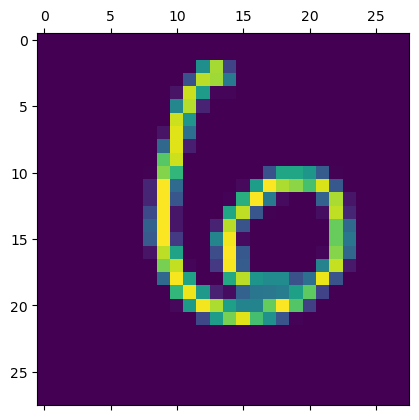

In [73]:
plt.matshow(x_test[100])

In [84]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6943 - loss: 12977.9580


[12964.8291015625, 0.7055000066757202]

In [85]:
y_predicted=model.predict(x_test_flattened)
y_predicted[5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step


array([0., 1., 1., 1., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [86]:
np.argmax(y_predicted[100])

2

In [87]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 0, 1, 0, 0]

In [88]:
y_test[:5] # this is integers value


array([7, 2, 1, 0, 4], dtype=uint8)

In [89]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[976,   0,   2,   2,   0,   0,   0,   0,   0,   0],
       [  3, 952,  91,  68,   0,   4,  14,   0,   3,   0],
       [394,   0, 618,   4,   6,   0,   4,   3,   3,   0],
       [496,   0, 188, 315,   2,   0,   0,   6,   3,   0],
       [176,   0, 107,  61, 587,   0,  18,   4,  29,   0],
       [746,   1,  33,  47,   6,  33,   3,   2,  21,   0],
       [537,   2, 354,  16,   1,   2,  46,   0,   0,   0],
       [203,   7, 126, 117,  67,   2,   2, 493,  11,   0],
       [234,   1, 187, 260,  11,  10,  12,  14, 245,   0],
       [150,   2,  30, 135, 491,   6,   2,  94,  98,   1]])>

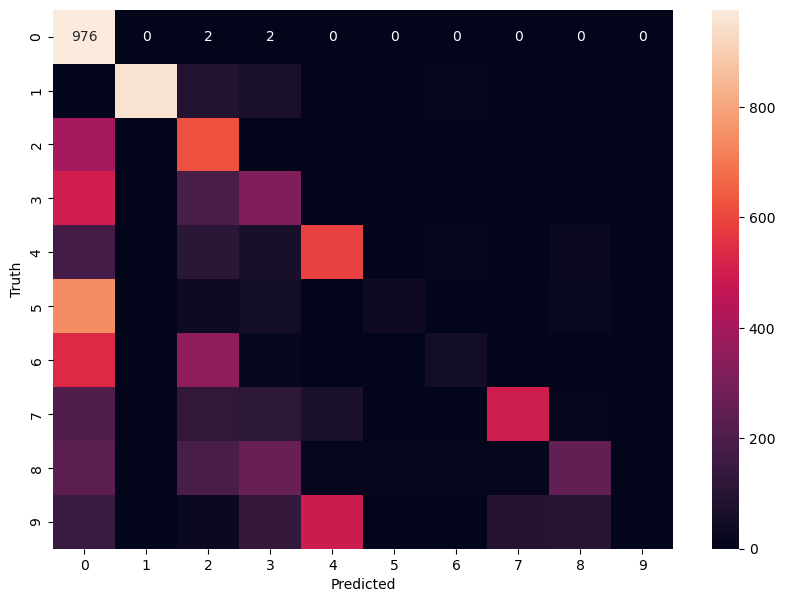

In [90]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Performing the same training with a hidden layer

In [93]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
              )
model.fit(x_train_flattened,y_train,epochs=10)

Epoch 1/10


c:\Users\Samee\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8019 - loss: 7.6684
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9018 - loss: 0.4101
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9246 - loss: 0.2840
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9350 - loss: 0.2484
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9391 - loss: 0.2347
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9449 - loss: 0.2133
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9446 - loss: 0.2043
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9468 - loss: 0.2054
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9507 - loss: 0.1897
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9533 - loss: 0.1787


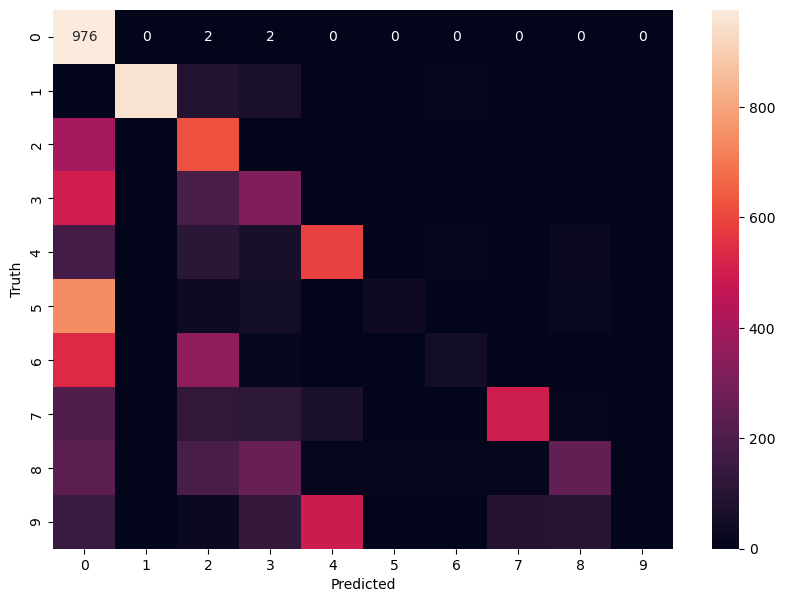

In [94]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# training the model using keras flatten function

In [97]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
              )
model.fit(x_train,y_train,epochs=5)

c:\Users\Samee\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7937 - loss: 7.6586
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9000 - loss: 0.4149
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9216 - loss: 0.3019
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9331 - loss: 0.2685
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9418 - loss: 0.2259
